### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [2]:
#model.compile(optimizer='adam',
 #             loss='sparse_categorical_crossentropy',
  #            metrics=['accuracy'])

In [3]:
data = keras.datasets.cifar10
#print(keras.datasets.cifar10.load_data())
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [4]:
# data analysis
print(f"train images shape: {train_images.shape}")
print(f"train labes shape: {train_labels.shape}")

print(f"test images shape: {test_images.shape}")
print(f"test labes shape: {test_labels.shape}")

train images shape: (50000, 32, 32, 3)
train labes shape: (50000, 1)
test images shape: (10000, 32, 32, 3)
test labes shape: (10000, 1)


In [5]:
from skimage.color import rgb2gray

# transform 3D images to 2D
train_images = rgb2gray(train_images)
train_images.shape

(50000, 32, 32)

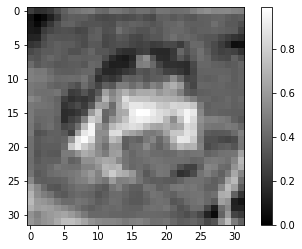

In [6]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.gray)
plt.colorbar()
plt.grid(False)

plt.show()

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [7]:
# model 1
model = keras.Sequential([
    keras.layers.Conv2D(filters=8, 
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 1), 
                        padding="valid"),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1800)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                57632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 58,042
Trainable params: 58,042
Non-trainable params: 0
____________________________________________________

In [8]:
train_images = np.expand_dims(train_images, axis=-1) 
print(train_images.shape)

(50000, 32, 32, 1)


In [9]:
# training the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9451 - accuracy: 0.2948
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5943 - accuracy: 0.4410
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4496 - accuracy: 0.4930
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3719 - accuracy: 0.5217
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3270 - accuracy: 0.5379
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2940 - accuracy: 0.5496
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2611 - accuracy: 0.5597
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2398 - accuracy: 0.5685
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2217 - accuracy: 0.5745
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.205

In [10]:
test_images = rgb2gray(test_images) 
test_images = np.expand_dims(test_images, axis=-1) 

test_images.shape

(10000, 32, 32, 1)

In [11]:
# Accuracy 
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 1.2646 - accuracy: 0.5562

Test accuracy: 0.5562000274658203


2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [12]:
# model 2
model_2 = keras.Sequential([
    keras.layers.Conv2D(filters=8, 
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 1), 
                        padding="valid"),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                28816     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [13]:
model_2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8884 - accuracy: 0.3141
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6086 - accuracy: 0.4291
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5081 - accuracy: 0.4668
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4548 - accuracy: 0.4837
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4168 - accuracy: 0.5009
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3864 - accuracy: 0.5101
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3643 - accuracy: 0.5174
Epoch 8/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3423 - accuracy: 0.5246
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3270 - accuracy: 0.5300
Epoch 10/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.309

In [14]:
# Accuracy 
test_loss_2, test_acc_2 = model_2.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc_2)

313/313 - 0s - loss: 1.3624 - accuracy: 0.5124

Test accuracy: 0.5123999714851379


In [15]:
print(f"The first model gives a lost of {test_loss} and the second {test_loss_2}. The first model gives an accuracy of {test_acc} and the second {test_acc_2}. The first model is more accurate, so an extra dense layer is not required.")

The first model gives a lost of 1.2646267414093018 and the second 1.3623504638671875. The first model gives an accuracy of 0.5562000274658203 and the second 0.5123999714851379. The first model is more accurate, so an extra dense layer is not required.


### 2.

Entrena la red neuronal 1 pero esta vez con las imágenes a color.

In [16]:
(train_images_3, train_labels_3), (test_images_3, test_labels_3) = data.load_data()

In [17]:
train_images_3.shape

(50000, 32, 32, 3)

In [18]:
# Normalization
train_images_3 = train_images_3 / 255.0
test_images_3 = test_images_3 / 255.0

In [19]:
# model 3
model_3 = keras.Sequential([
    keras.layers.Conv2D(filters=8, 
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 3), 
                        padding="valid"),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                57632     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 58,186
Trainable params: 58,186
Non-trainable params: 0
__________________________________________________

In [20]:
model_3.fit(train_images_3, train_labels_3, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7349 - accuracy: 0.3782
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4390 - accuracy: 0.4906
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3363 - accuracy: 0.5291
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2733 - accuracy: 0.5527
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2235 - accuracy: 0.5704
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1829 - accuracy: 0.5843
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1517 - accuracy: 0.5951
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1157 - accuracy: 0.6094
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0991 - accuracy: 0.6135
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.074

In [21]:
# Accuracy 
test_loss_3, test_acc_3 = model_3.evaluate(test_images_3, test_labels_3, verbose=2)

print('\nTest accuracy:', test_acc_3)

313/313 - 1s - loss: 1.1712 - accuracy: 0.5829

Test accuracy: 0.5828999876976013
